In [216]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [217]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\ibm-hr-analytics-employee-attrition-performance (1).zip")

In [218]:
data.head(6)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   
5   32        No  Travel_Frequently       1005  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   
5                 2          2  Life Sciences              1               8   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   
5  ...                         3            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   
5                  8                      2               2               7   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  
5                  7                        3                     6  

[6 rows x 35 columns]

In [219]:
data.shape

(1470, 35)

In [220]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [221]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [222]:
data["Attrition"].value_counts()
data.replace({"Yes":1,"No":0},inplace=True)

In [223]:
import six 
import joblib
import sys
sys.modules["sklearn.externals.six"]=six
sys.modules["sklearn.externals.joblib"]=joblib

In [224]:
from imblearn.over_sampling import SMOTE
from collections import Counter 

In [225]:
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [226]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [227]:
# All the following are not numeric datatypes , hence we need to convert them so as to interpret the results
print(data["BusinessTravel"])
print(data["Department"])
print(data["EducationField"])
print(data["Gender"])
print(data["JobRole"])
print(data["MaritalStatus"])
print(data["Over18"])

0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object
0                        Sales
1       Research & Development
2       Research & Development
3       Research & Development
4       Research & Development
                 ...          
1465    Research & Development
1466    Research & Development
1467    Research & Development
1468                     Sales
1469    Research & Development
Name: Department, Length: 1470, dtype: object
0       Life Sciences
1       Life Sciences
2               Other
3       Life Sciences
4             Medical
            ...      
1465          Medical
1466          Medical
1467    Life Sciences
1468          Medical
1469          Medical
Name: EducationField, Length: 1470,

In [228]:
print(data["StandardHours"].value_counts())
data.drop(columns=["StandardHours"],inplace=True)
data["Over18"].value_counts()
data.drop(columns=["Over18"],axis=1,inplace=True)

80    1470
Name: StandardHours, dtype: int64


In [229]:
data.shape

(1470, 33)

In [230]:
from sklearn.preprocessing import LabelEncoder 

In [231]:
data_frame=["BusinessTravel","Department","EducationField","Gender","JobRole","MaritalStatus"]

In [232]:
data[data_frame]=data[data_frame].apply(LabelEncoder().fit_transform)  

In [233]:
data.head(5)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
0          2               1              1               1  ...   
1          1               1              1               2  ...   
2          2               4              1               4  ...   
3          4               1              1               5  ...   
4          1               3              1               7  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                  3                         1                 0   
1                  4                         4                 1   
2                  3                         2                 0   
3                  3                         3                 0   
4                  3                         4                 1   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                  8                      0                1               6   
1                 10                      3                3              10   
2                  7                      3                3               0   
3                  8                      3                3               8   
4                  6                      3                3               2   

   YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                   4                        0                     5  
1                   7                        1                     7  
2                   0                        0                     0  
3                   7                        3                     0  
4                   2                        2                     2  

[5 rows x 33 columns]

In [234]:
x=data.drop("Attrition",axis=1)
y=data.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)  

In [235]:
sm=SMOTE()
samp=SMOTE(0.75)
x_trains,y_trains=samp.fit_resample(x_train,y_train)
print("Before transformation",format(Counter(y_train)))
print("After Transformation",format(Counter(y_trains)))

Before transformation Counter({0: 915, 1: 187})
After Transformation Counter({0: 915, 1: 686})


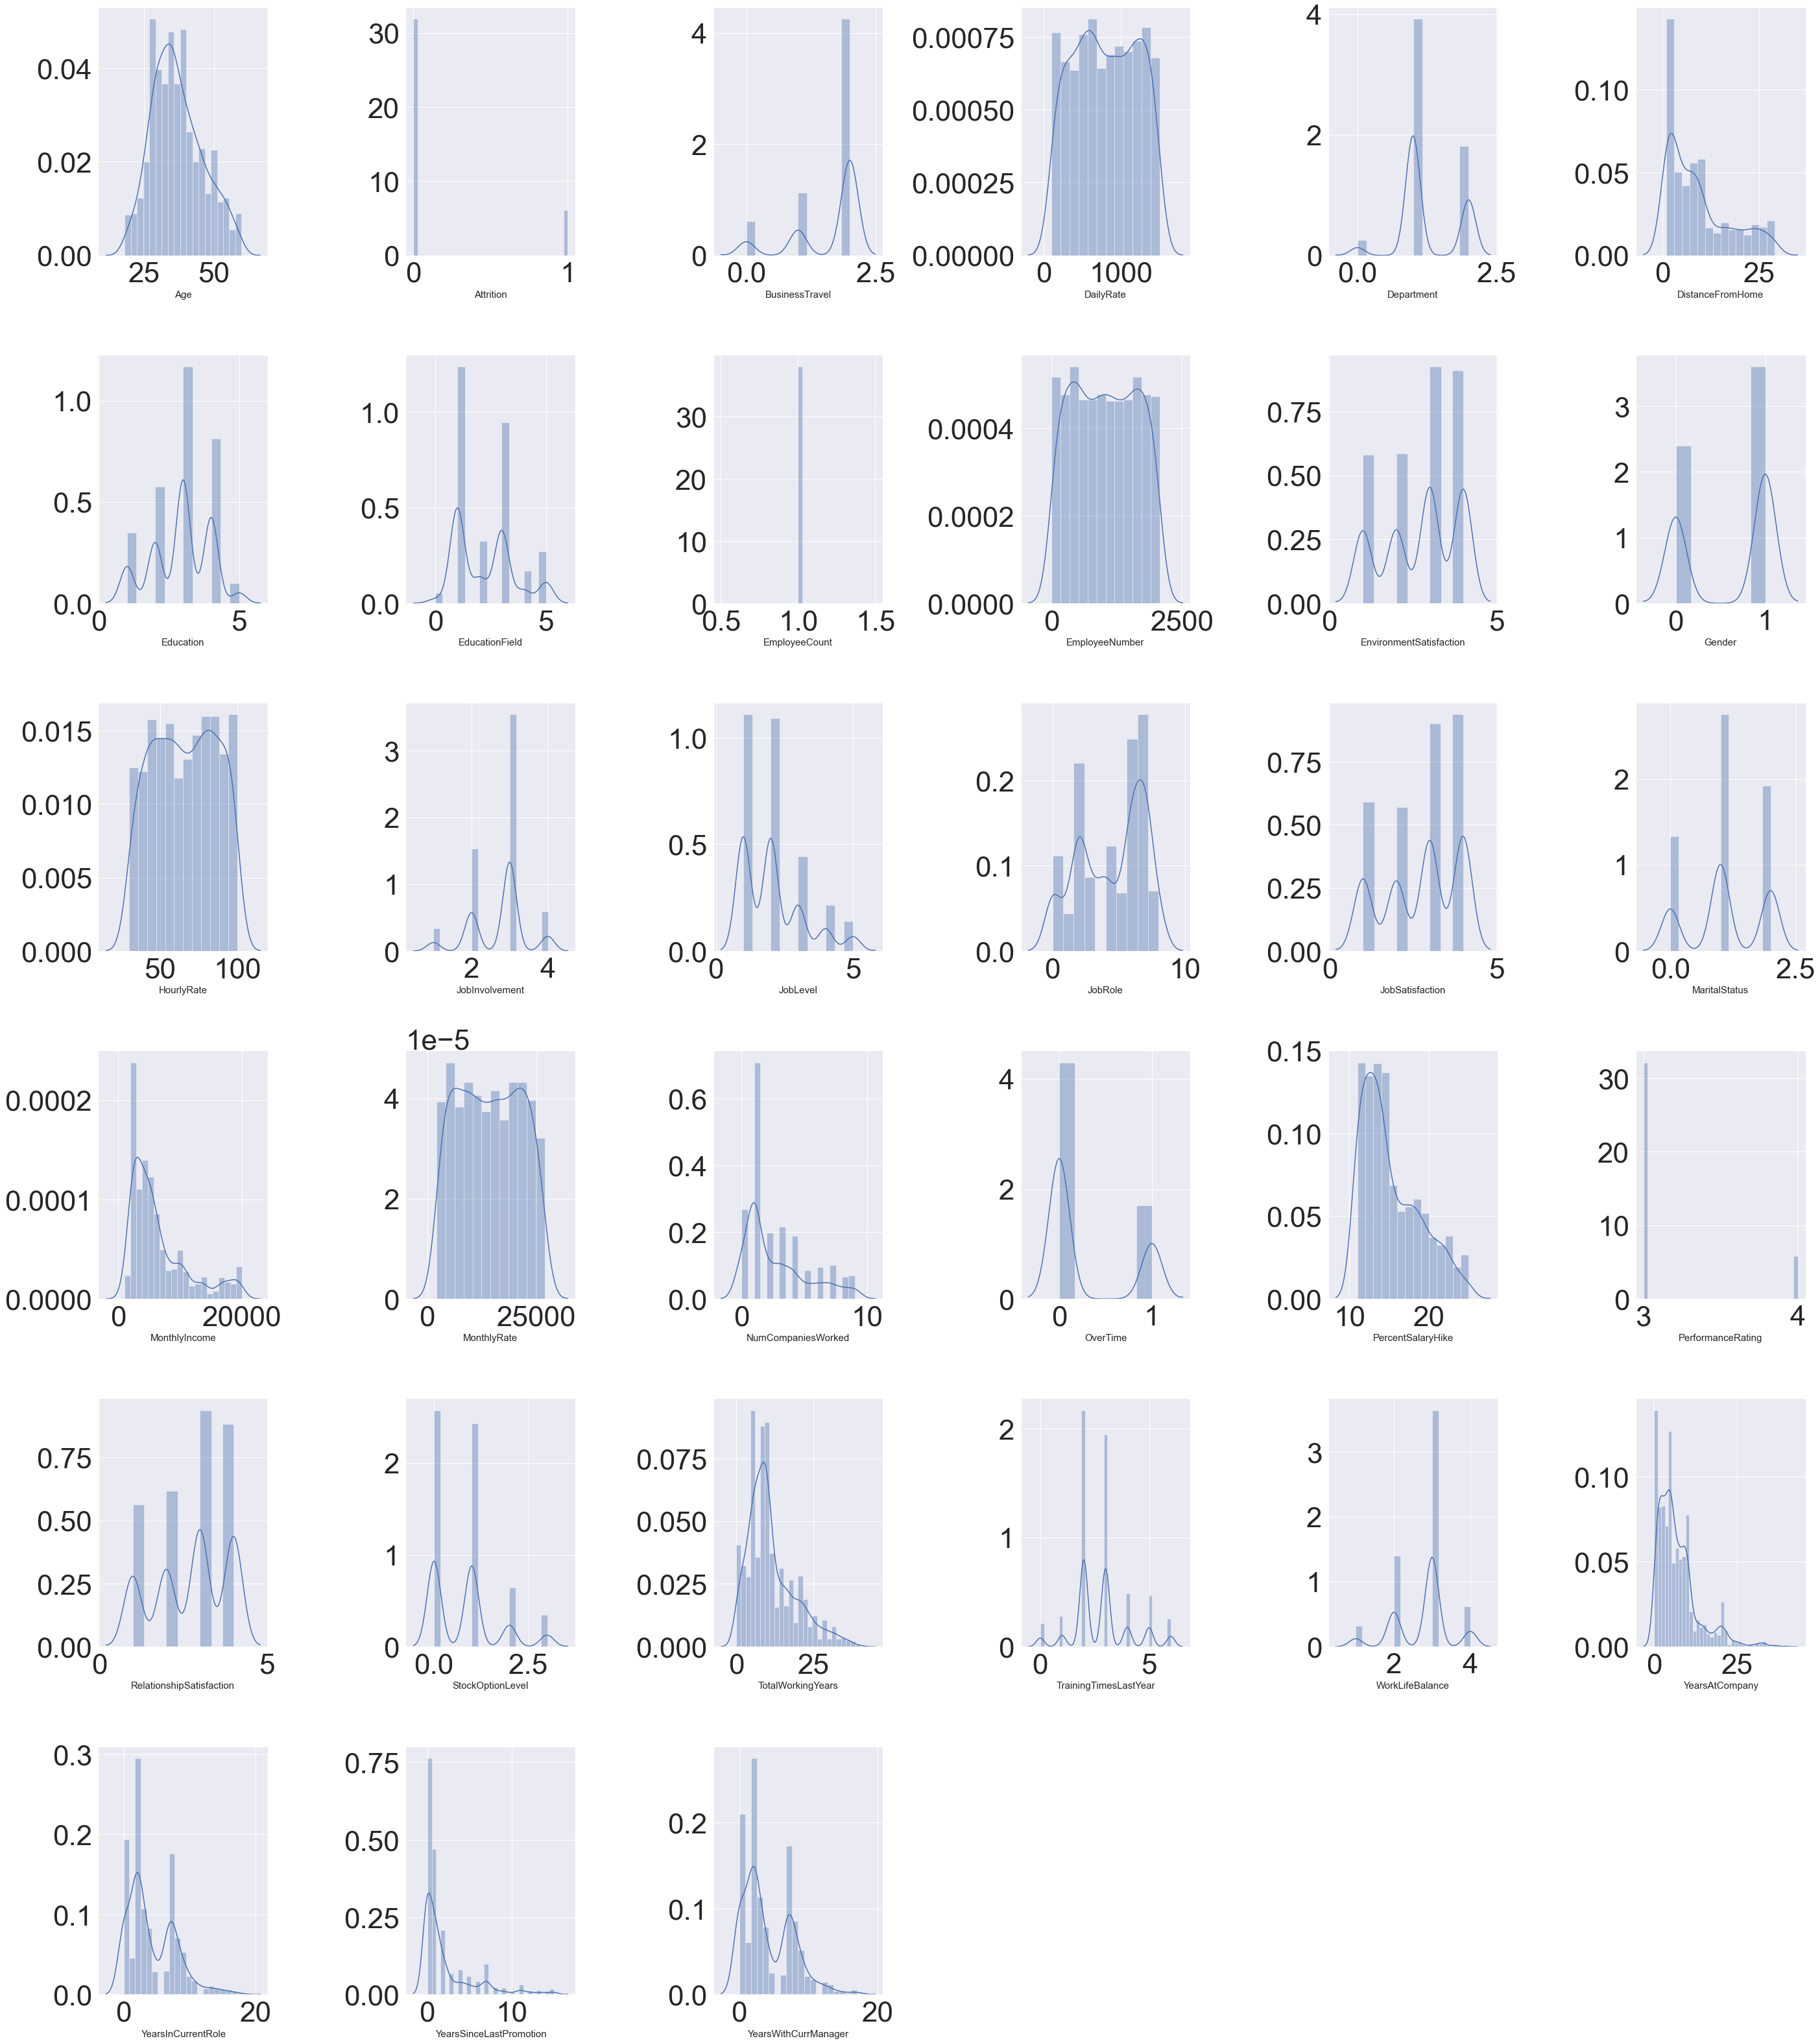

In [237]:
plt.figure(figsize=(40,45))
plotnumber=1
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

In [24]:

# Majorly the columns are categorical data 
# Their is some skewness in monthly income , distance from home 

In [238]:
data["MonthlyIncome"]=np.log(data["MonthlyIncome"])
data["DistanceFromHome"]=np.log(data["DistanceFromHome"])

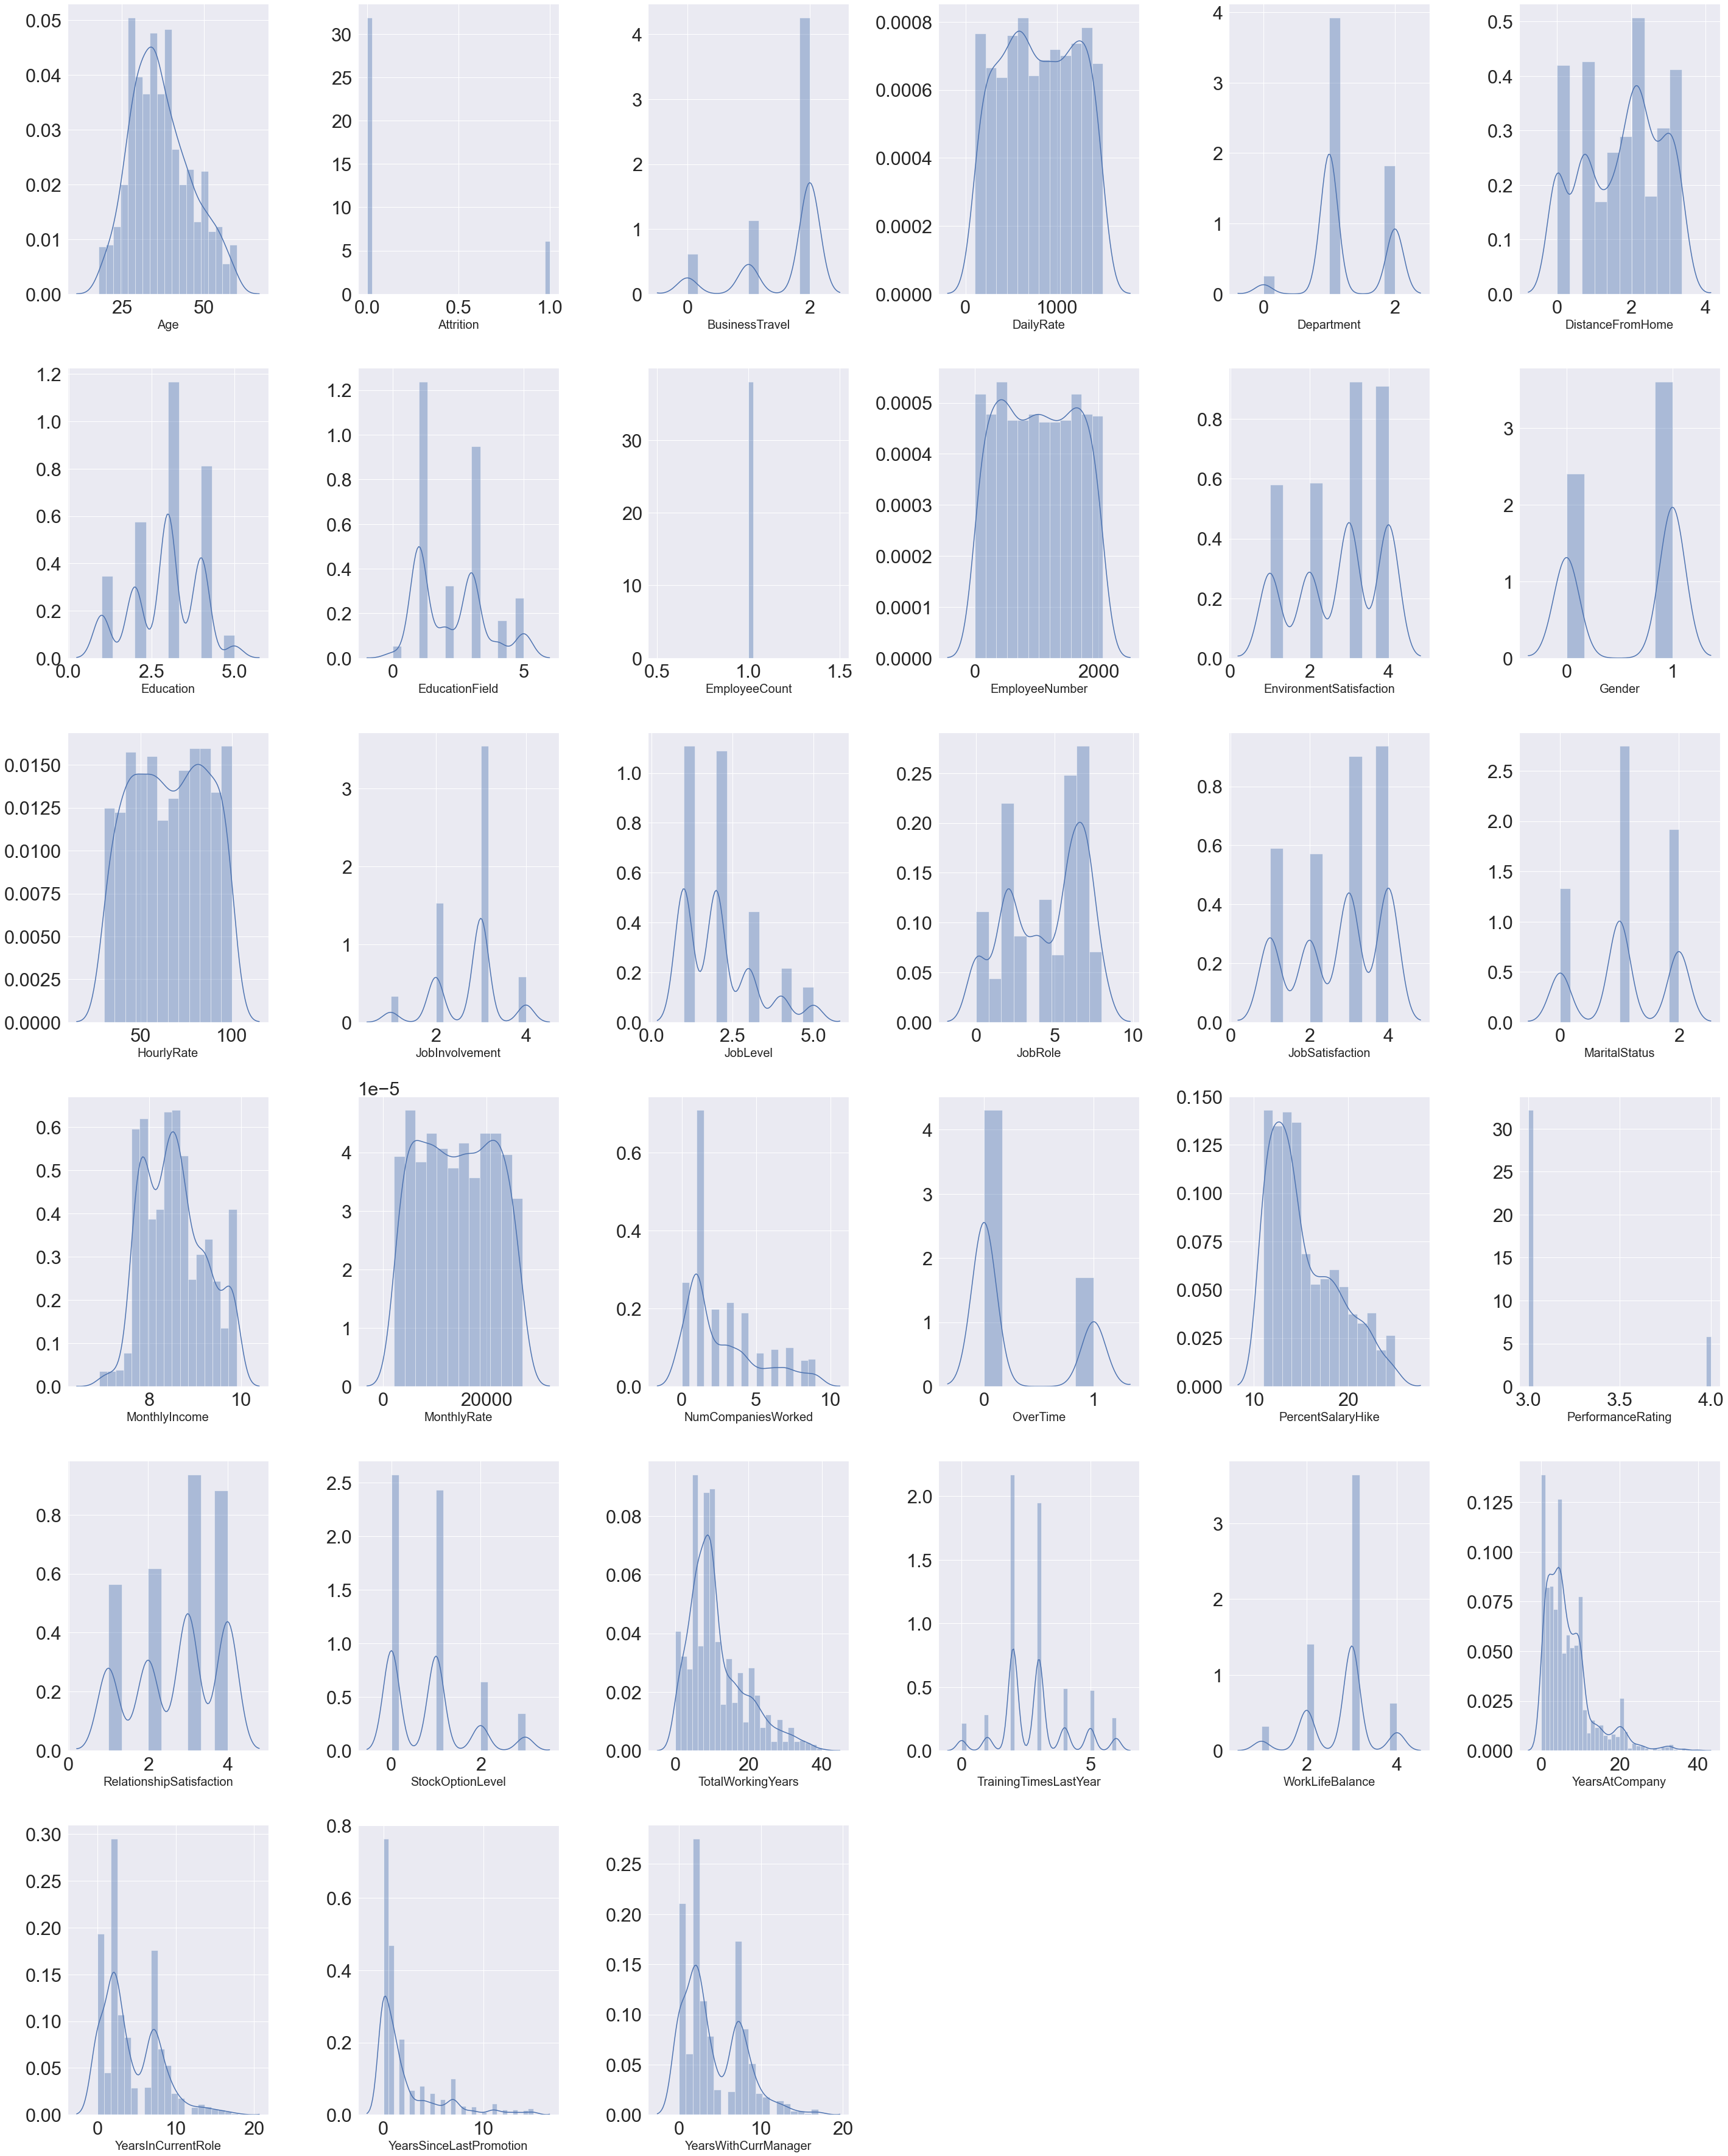

In [241]:
plt.figure(figsize=(40,50))
plotnumber=1
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

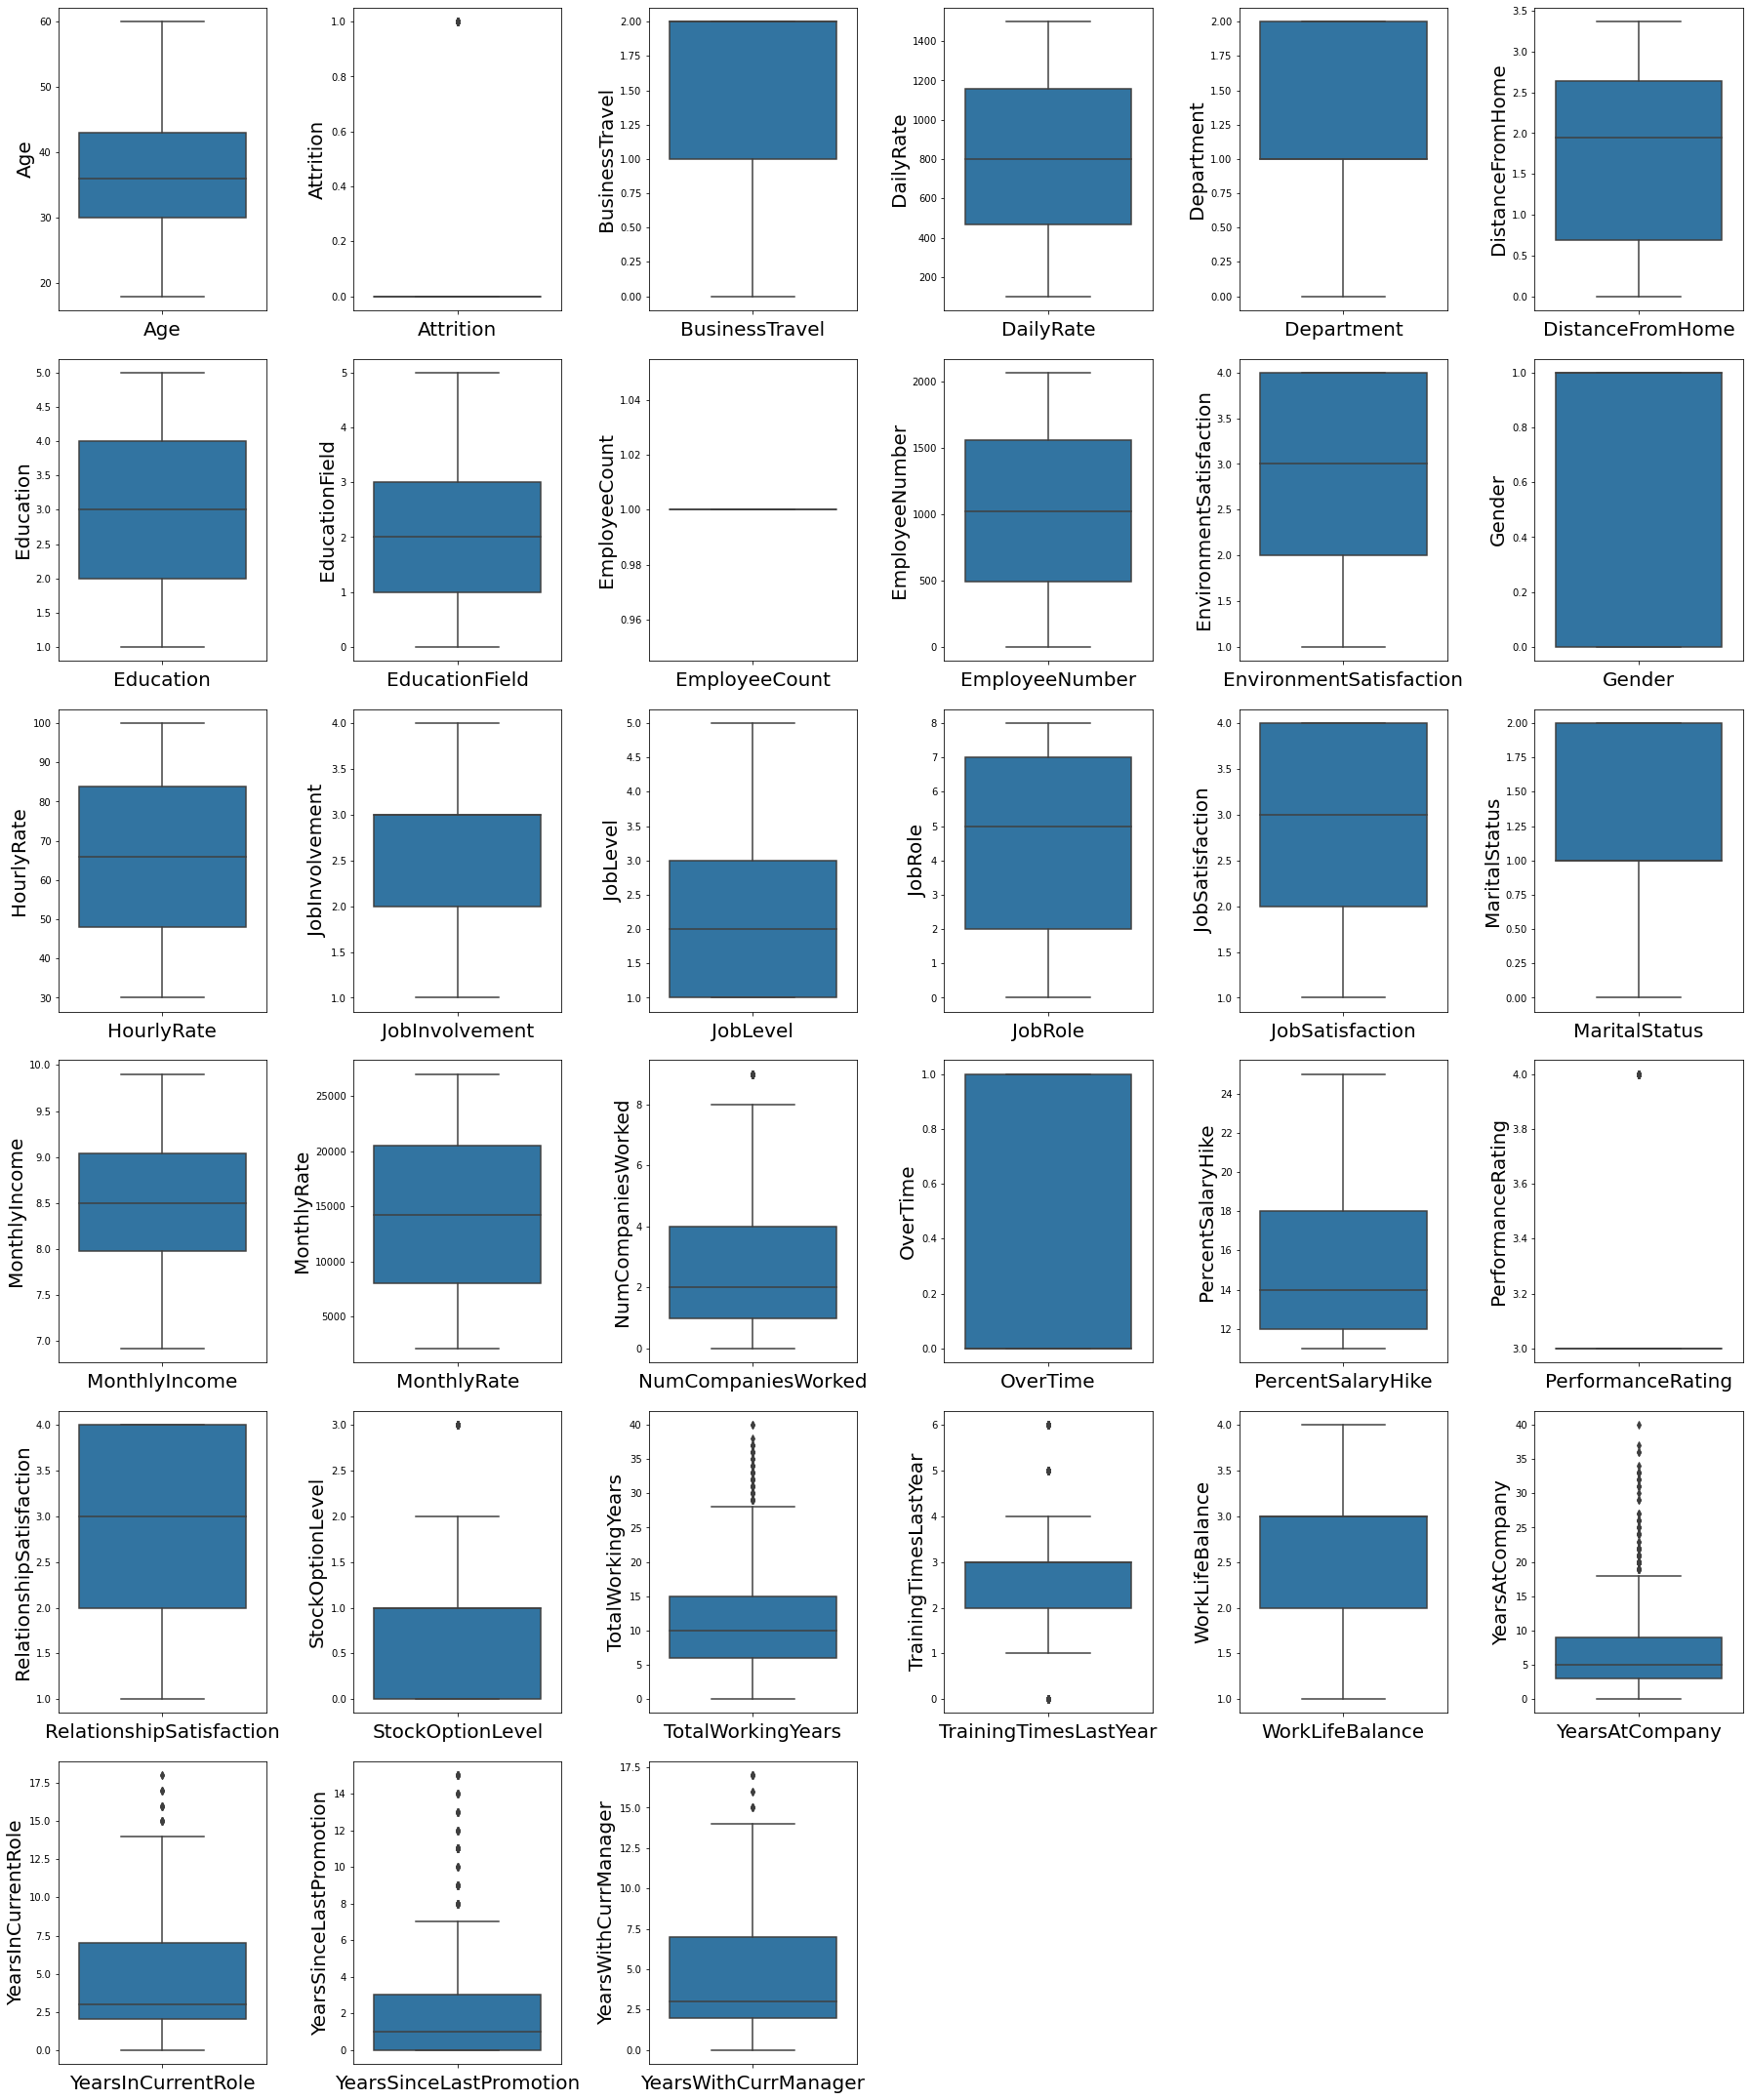

In [27]:
plt.figure(figsize=(25,30))
plotnumber=1
for column in data:
    if plotnumber<=36:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=20)
        plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [28]:
#their is just one outlier point in Number of Companies worked , which can hinder the functioning of model
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1

outlier1=(q3.NumCompaniesWorked+1.5*iqr.NumCompaniesWorked)
index=np.where(data["NumCompaniesWorked"]>outlier1)
data=data.drop(data.index[index])
data.reset_index()


index  Age  Attrition  BusinessTravel  DailyRate  Department  \
0         0   41          1               2       1102           2   
1         1   49          0               1        279           1   
2         2   37          1               2       1373           1   
3         3   33          0               1       1392           1   
4         5   32          0               1       1005           1   
...     ...  ...        ...             ...        ...         ...   
1413   1465   36          0               1        884           1   
1414   1466   39          0               2        613           1   
1415   1467   27          0               2        155           1   
1416   1468   49          0               1       1023           2   
1417   1469   34          0               2        628           1   

      DistanceFromHome  Education  EducationField  EmployeeCount  ...  \
0             0.000000          2               1              1  ...   
1             2.079442          1               1              1  ...   
2             0.693147          2               4              1  ...   
3             1.098612          4               1              1  ...   
4             0.693147          2               1              1  ...   
...                ...        ...             ...            ...  ...   
1413          3.135494          2               3              1  ...   
1414          1.791759          1               3              1  ...   
1415          1.386294          3               1              1  ...   
1416          0.693147          3               3              1  ...   
1417          2.079442          3               3              1  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         3                 0   
...                 ...                       ...               ...   
1413                  3                         3                 1   
1414                  3                         1                 1   
1415                  4                         2                 1   
1416                  3                         4                 0   
1417                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     8                      2                2   
...                 ...                    ...              ...   
1413                 17                      3                3   
1414                  9                      5                3   
1415                  6                      0                3   
1416                 17                      3                2   
1417                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  7                   7                        3   
...              ...                 ...                      ...   
1413               5                   2                        0   
1414               7                   7                        1   
1415     

In [29]:
# We are good to go,since this is real time data and accepted values .

In [30]:
corr=data.corr()
corr.shape

(33, 33)

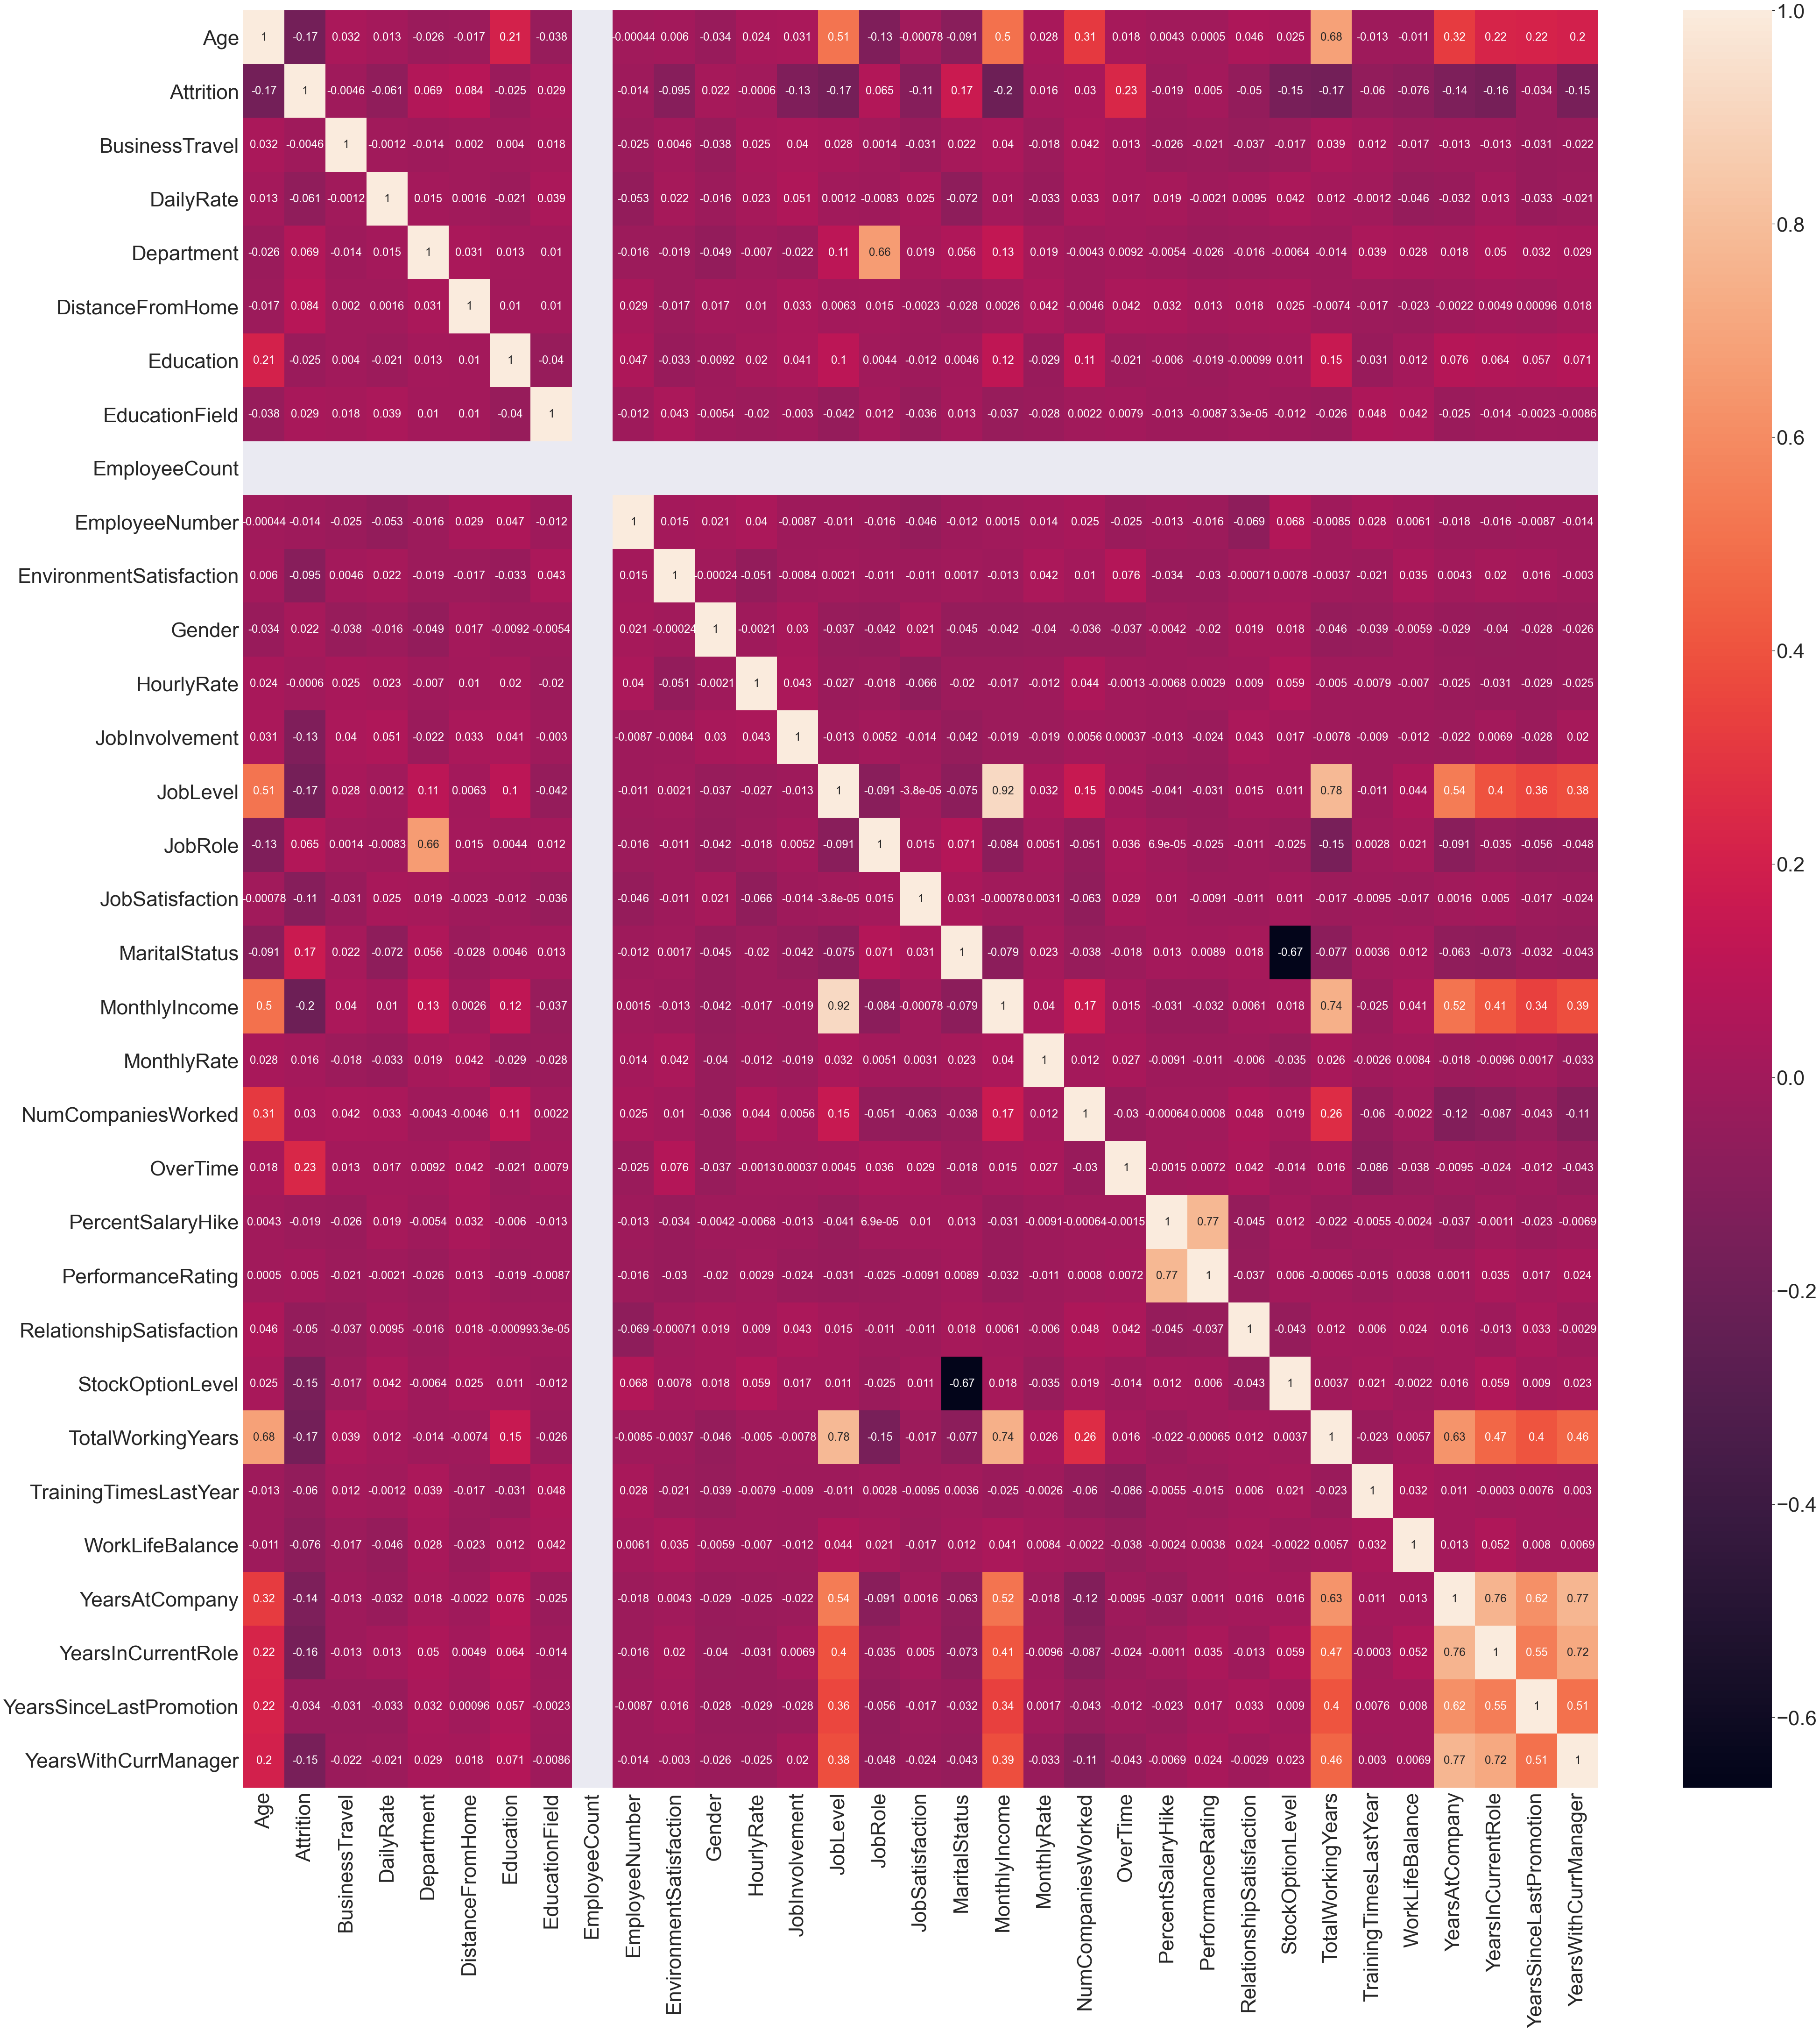

In [242]:
plt.figure(figsize=(65,70))
sns.set(font_scale=4)
sns.heatmap(corr,annot=True,annot_kws={'size':24}) 
plt.show()

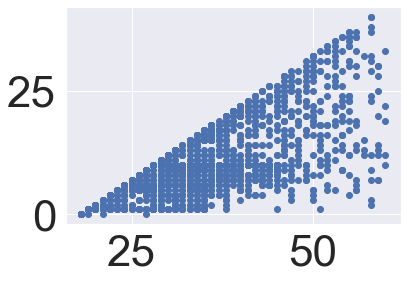

In [243]:
plt.scatter(data["Age"],data["TotalWorkingYears"])


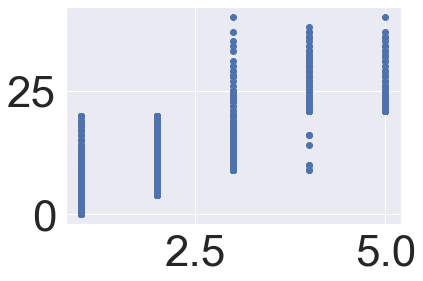

In [244]:
plt.scatter(data["JobLevel"],data["TotalWorkingYears"])

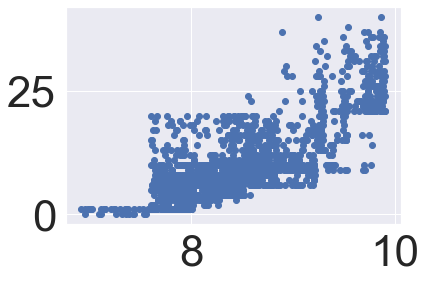

In [245]:
plt.scatter(data["MonthlyIncome"],data["TotalWorkingYears"])

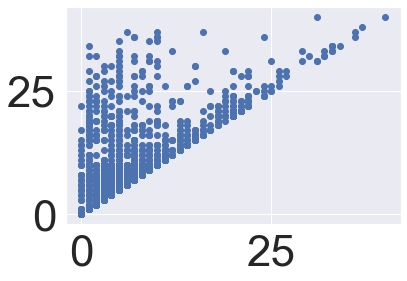

In [246]:
plt.scatter(data["YearsAtCompany"],data["TotalWorkingYears"])

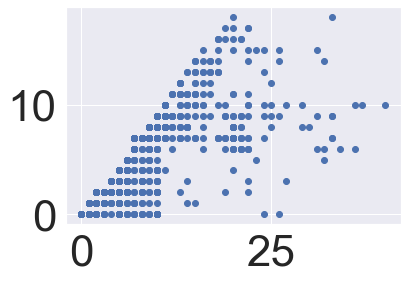

In [247]:
plt.scatter(data["YearsAtCompany"],data["YearsInCurrentRole"])

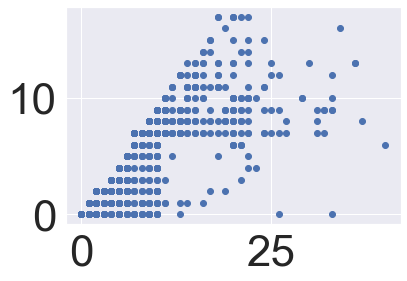

In [248]:
plt.scatter(data["YearsAtCompany"],data["YearsWithCurrManager"])  

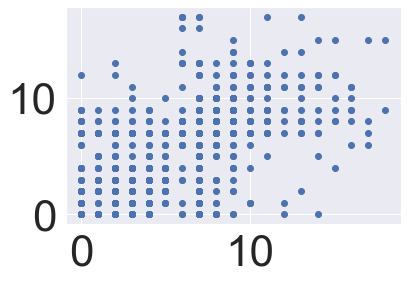

In [249]:
plt.scatter(data["YearsInCurrentRole"],data["YearsWithCurrManager"])

In [250]:
data.drop(columns=["Age","YearsAtCompany"],inplace=True)  

In [41]:
data.head(12)

Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0           1               2       1102           2          0.000000   
1           0               1        279           1          2.079442   
2           1               2       1373           1          0.693147   
3           0               1       1392           1          1.098612   
5           0               1       1005           1          0.693147   
6           0               2       1324           1          1.098612   
7           0               2       1358           1          3.178054   
8           0               1        216           1          3.135494   
9           0               2       1299           1          3.295837   
10          0               2        809           1          2.772589   
11          0               2        153           1          2.708050   
12          0               2        670           1          3.258097   

    Education  EducationField  EmployeeCount  EmployeeNumber  \
0           2               1              1               1   
1           1               1              1               2   
2           2               4              1               4   
3           4               1              1               5   
5           2               1              1               8   
6           3               3              1              10   
7           1               1              1              11   
8           3               1              1              12   
9           3               3              1              13   
10          3               3              1              14   
11          2               1              1              15   
12          1               1              1              16   

    EnvironmentSatisfaction  ...  PercentSalaryHike  PerformanceRating  \
0                         2  ...                 11                  3   
1                         3  ...                 23                  4   
2                         4  ...                 15                  3   
3                         4  ...                 11                  3   
5                         4  ...                 13                  3   
6                         3  ...                 20                  4   
7                         4  ...                 22                  4   
8                         4  ...                 21                  4   
9                         3  ...                 13                  3   
10                        1  ...                 13                  3   
11                        4  ...                 12                  3   
12                        1  ...                 17                  3   

    RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                          1                 0                  8   
1                          4                 1                 10   
2                          2                 0                  7   
3                          3                 0                  8   
5                          3                 0                  8   
6                          1                 3                 12   
7                          2                 1                  1   
8                          2                 0                 10   
9                          2                 2                 17   
10                         3                 1                  6   
11                         4                 0                 10   
12                         4                 1                  5   

    TrainingTimesLastYear  WorkLifeBalance  YearsInCurrentRole  \
0                       0                1                   4   
1                       3                3                   7   
2                       3                3                   0   
3                       3                3                   7   
5                

In [42]:
from sklearn.feature_selection import SelectKBest,f_classif
x=data.drop("Attrition",axis=1)
y=data.Attrition

In [43]:
best_features=SelectKBest(score_func=f_classif,k=25)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(25,"Scores_obtained"))

                Column_names  Scores_obtained
19                  OverTime        81.939272
16             MonthlyIncome        59.115231
24         TotalWorkingYears        44.295072
12                  JobLevel        42.638915
15             MaritalStatus        40.242881
27        YearsInCurrentRole        37.712574
23          StockOptionLevel        34.212702
29      YearsWithCurrManager        34.176343
11            JobInvolvement        23.683543
14           JobSatisfaction        15.812414
8    EnvironmentSatisfaction        12.983215
3           DistanceFromHome        10.126892
26           WorkLifeBalance         8.163499
2                 Department         6.792431
13                   JobRole         6.013881
1                  DailyRate         5.239027
25     TrainingTimesLastYear         5.195271
22  RelationshipSatisfaction         3.580866
28   YearsSinceLastPromotion         1.643559
18        NumCompaniesWorked         1.311180
5             EducationField      

In [44]:
final_data=data[["OverTime",
            "MonthlyIncome",
         "TotalWorkingYears",        
                  "JobLevel",                     
               "MaritalStatus",        
        "YearsInCurrentRole" ,       
            "StockOptionLevel",
         "YearsWithCurrManager",                               
            "JobInvolvement",  
           "JobSatisfaction",        
    "EnvironmentSatisfaction",        
           "DistanceFromHome",
            "WorkLifeBalance",     
                 "Department",
                 "JobRole",
                 "DailyRate",        
     "TrainingTimesLastYear",        
   "RelationshipSatisfaction",
    "YearsSinceLastPromotion",
         "NumCompaniesWorked",      
                 "EducationField",
                 "Education",
                    "Gender",
                 "PercentSalaryHike",
           "MonthlyRate"]]

In [45]:
final_data

OverTime  MonthlyIncome  TotalWorkingYears  JobLevel  MaritalStatus  \
0            1       8.698347                  8         2              2   
1            0       8.542861                 10         2              1   
2            1       7.644919                  7         1              2   
3            1       7.975565                  8         1              1   
5            0       8.028781                  8         1              2   
...        ...            ...                ...       ...            ...   
1465         0       7.852050                 17         2              1   
1466         0       9.209440                  9         3              1   
1467         1       8.722906                  6         2              1   
1468         0       8.592301                 17         2              1   
1469         0       8.390268                  6         2              1   

      YearsInCurrentRole  StockOptionLevel  YearsWithCurrManager  \
0                      4                 0                     5   
1                      7                 1                     7   
2                      0                 0                     0   
3                      7                 0                     0   
5                      7                 0                     6   
...                  ...               ...                   ...   
1465                   2                 1                     3   
1466                   7                 1                     7   
1467                   2                 1                     3   
1468                   6                 0                     8   
1469                   3                 0                     2   

      JobInvolvement  JobSatisfaction  ...  DailyRate  TrainingTimesLastYear  \
0                  3                4  ...       1102                      0   
1                  2                2  ...        279                      3   
2                  2                3  ...       1373                      3   
3                  3                3  ...       1392                      3   
5                  3                4  ...       1005                      2   
...              ...              ...  ...        ...                    ...   
1465               4                4  ...        884                      3   
1466               2                1  ...        613                      5   
1467               4                2  ...        155                      0   
1468               2                2  ...       1023                      3   
1469               4                3  ...        628                      3   

      RelationshipSatisfaction  YearsSinceLastPromotion  NumCompaniesWorked  \
0                            1                        0                   8   
1                            4                        1                   1   
2                            2                        0                   6   
3                            3                        3                   1   
5                            3                        3                   0   
...                        ...                      ...                 ...   
1465                         3                        0                   4   
1466                         1                        1                   4   
1467                         2                        0                   1   
1468                         4                        0                   2   
1469                         1                        1                   2   

      EducationField  Education  Gender  PercentSalaryHike  MonthlyRate  
0                  1          2       0                 11        19479  
1                  1          1       1                 23        24907  
2                  4          2       1                 15         2396  
3                  1          4       0                 11

In [46]:
x=final_data
y=data.Attrition
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)  

In [47]:
# We are good to go with the final data 

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier()
from time import time
start=time()
knn.fit(x_train,y_train)
print("Training Time:",time()-start) 

Training time: 0.016002655029296875


In [62]:
start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Testing Time: 0.16061758995056152


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89       290
           1       0.22      0.03      0.05        65

    accuracy                           0.80       355
   macro avg       0.52      0.50      0.47       355
weighted avg       0.71      0.80      0.74       355



In [64]:
confusion_matrix(y_test,y_pred)

array([[283,   7],
       [ 63,   2]], dtype=int64)

In [67]:
from sklearn.model_selection import cross_val_score 

In [68]:
cross_val_score(knn,x,y,cv=6).mean()

0.8251120408114615

In [70]:
# Hence the model is not overfitting the data 
#lets check on other algorithms as well

In [73]:
from sklearn.model_selection import GridSearchCV
param_grid={"algorithm" : ["kd_tree","brute"],
           "leaf_size" : range(4,8),
           "n_neighbors" : [3,4,5,6,7]}

In [74]:
grdsrch=GridSearchCV(estimator=knn,param_grid=param_grid)

In [75]:
grdsrch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': range(4, 8),
                         'n_neighbors': [3, 4, 5, 6, 7]})

In [76]:
grdsrch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_neighbors': 6}

In [79]:
knn=KNeighborsClassifier(algorithm= 'kd_tree', leaf_size= 4, n_neighbors= 6)
start=time()
knn.fit(x_train,y_train)
print("Training Time:",time()-start) 

Training Time: 0.04298281669616699


In [80]:
start=time()
y_pred=knn.predict(x_test)
print("Training Time:",time()-start) 

Training Time: 0.06400918960571289


In [81]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89       290
           1       0.00      0.00      0.00        65

    accuracy                           0.81       355
   macro avg       0.41      0.49      0.45       355
weighted avg       0.67      0.81      0.73       355



In [82]:
# Accuracy increases by 1.1 %
from sklearn.tree import DecisionTreeClassifier

In [102]:
dt=DecisionTreeClassifier()

In [84]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [85]:
start=time()
dt.fit(x_train,y_train)
print("Training Time:",time()-start) 

Training Time: 0.12801790237426758


In [86]:
start=time()
y_pred=dt.predict(x_test)
print("Training Time:",time()-start) 

Training Time: 0.008005380630493164


In [89]:
cfm=confusion_matrix

In [90]:
cfm(y_test,y_pred)

array([[261,  29],
       [ 47,  18]], dtype=int64)

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       290
           1       0.38      0.28      0.32        65

    accuracy                           0.79       355
   macro avg       0.62      0.59      0.60       355
weighted avg       0.76      0.79      0.77       355



In [93]:
cross_val_score(dt,x,y,cv=10).mean()

0.7700978923184497

In [ ]:
# Data is not overfitting 


In [98]:
param_grid={"criterion": ["gini","entropy"],  
           "max_depth": range(6,15),
           "min_samples_leaf": range(2,8),
           "min_samples_split": range(3,5)}

In [99]:
grdsrch=GridSearchCV(estimator=dt,param_grid=param_grid)
grdsrch.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(6, 15),
                         'min_samples_leaf': range(2, 8),
                         'min_samples_split': range(3, 5)})

In [101]:
grdsrch.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 7,
 'min_samples_split': 3}

In [103]:
dt=DecisionTreeClassifier(criterion='entropy',
 max_depth= 6,
 min_samples_leaf= 7,
 min_samples_split= 3)

In [105]:
start=time()
dt.fit(x_train,y_train)
print("Training Time:",time()-start)

Training Time: 0.03200387954711914


In [107]:
start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Testing Time: 0.00800180435180664


In [109]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       318
           1       0.37      0.65      0.47        37

    accuracy                           0.85       355
   macro avg       0.66      0.76      0.69       355
weighted avg       0.89      0.85      0.87       355



In [110]:
cfm(y_test,y_pred)

array([[277,  13],
       [ 41,  24]], dtype=int64)

In [111]:
# The accuracy is 85%
from sklearn.ensemble import AdaBoostClassifier

In [113]:
ad=AdaBoostClassifier()  

In [114]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [115]:
y_pred=ad.predict(x_test)

In [118]:
cfm(y_test,y_pred)

array([[276,  14],
       [ 36,  29]], dtype=int64)

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       290
           1       0.67      0.45      0.54        65

    accuracy                           0.86       355
   macro avg       0.78      0.70      0.73       355
weighted avg       0.85      0.86      0.85       355



In [121]:
cross_val_score(ad,x,y,cv=10).mean()

0.8709719308760364

In [129]:
from sklearn.ensemble import BaggingClassifier
bag_cls=BaggingClassifier(dt,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)

In [130]:
ad.score(x_test,y_test)

0.8591549295774648

In [132]:
bag_cls.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=6,
                                                        min_samples_leaf=7,
                                                        min_samples_split=3),
                  max_samples=0.6, n_estimators=6, oob_score=True,
                  random_state=4)

In [133]:
bag_cls.score(x_test,y_test)

0.8450704225352113

In [134]:
# Lets check on other algorithms as well


In [135]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [136]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier()

In [137]:
y_pred=gbdt.predict(x_test)

In [138]:
cfm(y_test,y_pred)

array([[284,   6],
       [ 47,  18]], dtype=int64)

In [140]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       290
           1       0.75      0.28      0.40        65

    accuracy                           0.85       355
   macro avg       0.80      0.63      0.66       355
weighted avg       0.84      0.85      0.82       355



In [147]:
param_grid={  
           "max_depth": range(2,5),
           "min_samples_leaf": range(4,8),
           "min_samples_split": range(3,6)}

In [148]:
grdsrch=GridSearchCV(estimator=gbdt,param_grid=param_grid)
#grdsrch.fit(x_train,y_train)

In [149]:
grdsrch.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': range(2, 5),
                         'min_samples_leaf': range(4, 8),
                         'min_samples_split': range(3, 6)})

In [153]:
grdsrch.best_params_
#gbdt=GradientBoostingClassifier()

{'max_depth': 2, 'min_samples_leaf': 6, 'min_samples_split': 3}

In [154]:
gbdt=GradientBoostingClassifier(max_depth= 2, min_samples_leaf= 6, min_samples_split= 3)

In [155]:
gbdt.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=2, min_samples_leaf=6, min_samples_split=3)

In [156]:
y_pred=gbdt.predict(x_test)

In [157]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       290
           1       0.90      0.28      0.42        65

    accuracy                           0.86       355
   macro avg       0.88      0.64      0.67       355
weighted avg       0.87      0.86      0.83       355



In [190]:
#Hence accuracy increased by 1%
import xgboost as xgt

In [191]:
xgts=xgt.XGBClassifier()

In [192]:
xgts.fit(x_train,y_train)

[14:47:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [194]:
y_pred=xgts.predict(x_test)

In [195]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       290
           1       0.70      0.32      0.44        65

    accuracy                           0.85       355
   macro avg       0.78      0.65      0.68       355
weighted avg       0.83      0.85      0.83       355



In [196]:
cfm(y_test,y_pred)

array([[281,   9],
       [ 44,  21]], dtype=int64)

In [198]:
cross_val_score(xgts,x,y,cv=10).mean()

[14:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

0.8512236539806214

In [199]:
# Hence the model is not overfitting 


In [200]:
from sklearn.model_selection import RandomizedSearchCV

In [201]:
params={'n_estimators':[10,12,14,15,18],
       'learning_rate':[0.20,0.25,0.30,0.35]}

In [202]:
rndsrch=RandomizedSearchCV(xgts,cv=4,param_distributions=params) 

In [203]:
rndsrch.fit(x_train,y_train)

[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:48:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           enable_categorical=False, gamma=0,
                                           gpu_id=-1, importance_type=None,
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=2,
                                           num_parallel_tree=1,
                                           predictor='auto

In [204]:
rndsrch.best_params_

{'n_estimators': 14, 'learning_rate': 0.35}

In [205]:
xgbt=xgt.XGBClassifier(n_estimators= 10, learning_rate= 0.3)

In [206]:
xgbt.fit(x_train,y_train)

[14:50:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [208]:
y_pred=xgbt.predict(x_test)

In [209]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       290
           1       0.78      0.28      0.41        65

    accuracy                           0.85       355
   macro avg       0.82      0.63      0.66       355
weighted avg       0.84      0.85      0.82       355



In [210]:
# Hence the accuracy is 86% by GradientBoosting. 

In [211]:
import pickle

In [1]:
final_model="attrition.pickle"
pickle.dump(gbdt,open(final_model,'wb')) 

NameError: name 'pickle' is not defined

In [2]:
# since this algorthm gives maximum accuracy of 86% without overfitting 